# Contents of this part:
* loading and visualizing the MNIST dataset (training and test subsets)
* build and evaluate a simple CNN model
    * Experiments:
        * changing network structure/adding more layers: conv, pool, dropout, or fully connected
        * changing meta parameters
        * reduce the size of the training set to see how many samples are required for a good model
* Beyond accuracy: some additional metrics of predictive performance 
* visualize network architecture (does not work yet; requires graphviz and Pydot libraries)
* Inspecting a learned network: visualizing learned network weights, visualizing network activations, ...
* What are the important features in a given input image: systematic occlusion experiment

Now, let's train an extremely simple CNN:
First, we have to load the keras libraries and prepare the MNIST dataset (in this version it is already split into a training and a test set)

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
%matplotlib inline 
# todo: replace link to MNIST dataset:
(X_train, y_train), (X_test, y_test) = mnist.load_data("mnist.pkl.gz")

Let's look at some of the MNIST samples:

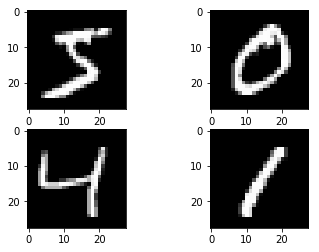

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
# take one channel only:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Time to define and train our first (not-so)-deep neural network!
### Suggestions for experimenting:
You can experiment a bit with the number of epochs, batch size, or even with the *number of training samples* (can we still train a good model with, say 10000 instead of 60000 training samples?)
Try what happens with predictive performance if you add a dropout layer, additional Conv/Pool layers, and/or another fully connected layer

In [7]:
def model1():
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model   

In [8]:
# build the model
model = model1()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="valid", activation="relu", input_shape=(1, 28, 28...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
93s - loss: 0.2247 - acc: 0.9359 - val_loss: 0.0891 - val_acc: 0.9721
Epoch 2/10
95s - loss: 0.0649 - acc: 0.9810 - val_loss: 0.0482 - val_acc: 0.9839
Epoch 3/10
96s - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0462 - val_acc: 0.9844
Epoch 4/10
95s - loss: 0.0338 - acc: 0.9894 - val_loss: 0.0354 - val_acc: 0.9884
Epoch 5/10
95s - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0431 - val_acc: 0.9860
Epoch 6/10
95s - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0412 - val_acc: 0.9864
Epoch 7/10
96s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 8/10
96s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0414 - val_acc: 0.9872
Epoch 9/10
96s - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0333 - val_acc: 0.9894
Epoch 10/10
95s - loss: 0.0082 - acc: 0.9977 - val_loss: 0.0385 - val_acc: 0.9885
Baseline Error: 1.15%


It's always good to inspect some additional metrics of predictive performance. If you're not familiar with them you could check their definition:

In [9]:
Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)
yt = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
print(classification_report(yt, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.98      1.00      0.99      1032
          3       0.97      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.98      0.99       892
          6       1.00      0.99      0.99       958
          7       0.99      0.98      0.99      1028
          8       0.99      0.98      0.99       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



We can visualize the architecture of the neural network, but currently the graphviz back-end and the pydot wrapper is not available in our environment. Anyways, this is how it would work: 

In [10]:
from keras.utils.visualize_util import plot
plot(model) # , to_file='model.png')

ImportError: No module named visualize_util

# Visualize weights and convolutions:

In [11]:
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic


('W shape : ', (32, 5, 5))


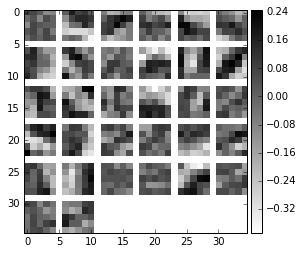

In [21]:
# Visualize weights
W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=plt.cm.binary)

It's very useful to be able to save or load module weights, for later model inspection, for continuing to train, or for transfer learning (transferring a learned model to a different dataset).
Question: What is the difference between model.save and model.save_weights?

In [12]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

It may also be instructive to look at the activations in a specific network layer, given a specific input sample. If you are interested in how this is done you can google "visualizing network activations keras"....

## What is the classifier "looking at" in a given image? Systematic occlusion experiment: 

So what are the key regions in the following digit for the classifier?

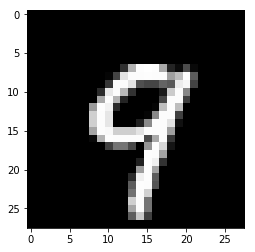

In [13]:
plt.imshow(X_test[12,0,:,:], cmap=plt.get_cmap('gray'))

In [14]:
model.predict(X_test[12:13,:,:,:])

array([[  1.09467305e-11,   1.67104715e-11,   4.28287716e-09,
          6.12939175e-06,   3.14096997e-06,   2.57675445e-08,
          7.44461404e-13,   1.01103907e-07,   4.69509899e-07,
          9.99990106e-01]], dtype=float32)

Let's take a part away from that digit....

In [15]:
import copy
xx = copy.copy(X_test[12:13,:,:,:])
xx[0,0,5:17,5:16] = 0

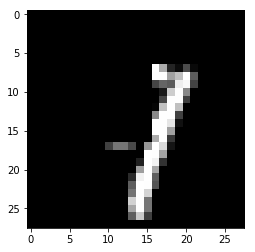

In [16]:
plt.imshow(xx[0,0,:,:], cmap=plt.get_cmap('gray'))

Now the classifier thinks it's most likely a 7, as we can see when predicting again (question: what do you think would happen if we had "European" 1s in the dataset, too?!):

In [17]:
model.predict(xx[0:1,:,:,:])

array([[  2.21284972e-06,   1.91220941e-04,   4.62521275e-05,
          1.39423264e-06,   3.27059533e-04,   3.48505793e-08,
          2.39841436e-09,   9.98668909e-01,   2.51685597e-05,
          7.37696479e-04]], dtype=float32)

Now let's try to do the occlusion systematically, sliding a black square across the image:

In [18]:
def occlude(X, size=10):
    Y = np.zeros(((X.shape[1]-size)*(X.shape[0]-size), 1, 28, 28))
    for i in xrange(0, X.shape[0]-size):
        for j in xrange(0, X.shape[1]-size):
            XX = X.copy()
            XX[i:(i+size), j:(j+size)] = 0
            Y[j+i*(X.shape[1]-size),0,:,:] = XX
    return Y

In [19]:
xx = copy.copy(X_test[12:13,:,:,:])

In [20]:
Y = occlude(xx[0,0,:,:])

We now have 324 partially occluded images generated from our original '9' digit. Have a look at some of them if you like:

(324, 1, 28, 28)


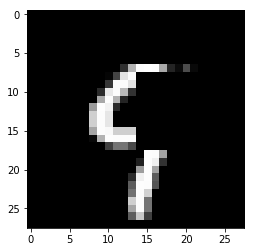

In [21]:
print(Y.shape)
plt.imshow(Y[158,0,:,:], cmap=plt.get_cmap('gray'))

Now, let's make the predictions for all of them using our classifier:

In [22]:
pp = model.predict(Y)

In [23]:
pred = model.predict(X_test[12:13,:,:,:])
pred

array([[  1.09467305e-11,   1.67104715e-11,   4.28287716e-09,
          6.12939175e-06,   3.14096997e-06,   2.57675445e-08,
          7.44461404e-13,   1.01103907e-07,   4.69509899e-07,
          9.99990106e-01]], dtype=float32)

In [24]:
myDiff = ([pred[0,9]]*len(pp[:,9])) -pp[:,9]
diffMatrix = np.reshape(myDiff, (18,18), order='C')

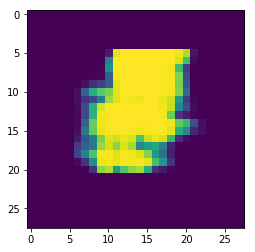

In [25]:
DD = np.zeros((28,28))
DD[5:23,5:23] = diffMatrix
plt.imshow(DD)

....so in this case, the importance map is not too surprising or enlightening. If you want you can experiment with the size of the sliding black square. We used 10x10 which is quite big for the 28x28 thumbnails.

You could also experiment with some other digits from the MNIST test dataset....